In [1]:
from quantbullet.utils.data import generate_fake_happiness_data
from quantbullet.r.mgcv_bam import MgcvBamWrapper
import matplotlib.pyplot as plt

Error importing in API mode: ImportError('On Windows, cffi mode "ANY" is only "ABI".')
Trying to import in ABI mode.


In [2]:
data = generate_fake_happiness_data()

In [3]:
model = MgcvBamWrapper()

- Project 'C:/Users/yimingz/repo/quantbullet' loaded. [renv 1.1.5]
- The project is out-of-sync -- use `renv::status()` for details.


In [4]:
model.fit( data, formula="happiness ~ level + s(age, by=level) + s(income) + s(education)" )

Model fitted from DataFrame: py_df_to_r=0.00s | bam_fit=0.04s


MgcvBamWrapper(fitted, formula='happiness ~ level + s(age, by=level) + s(income) + s(education)')

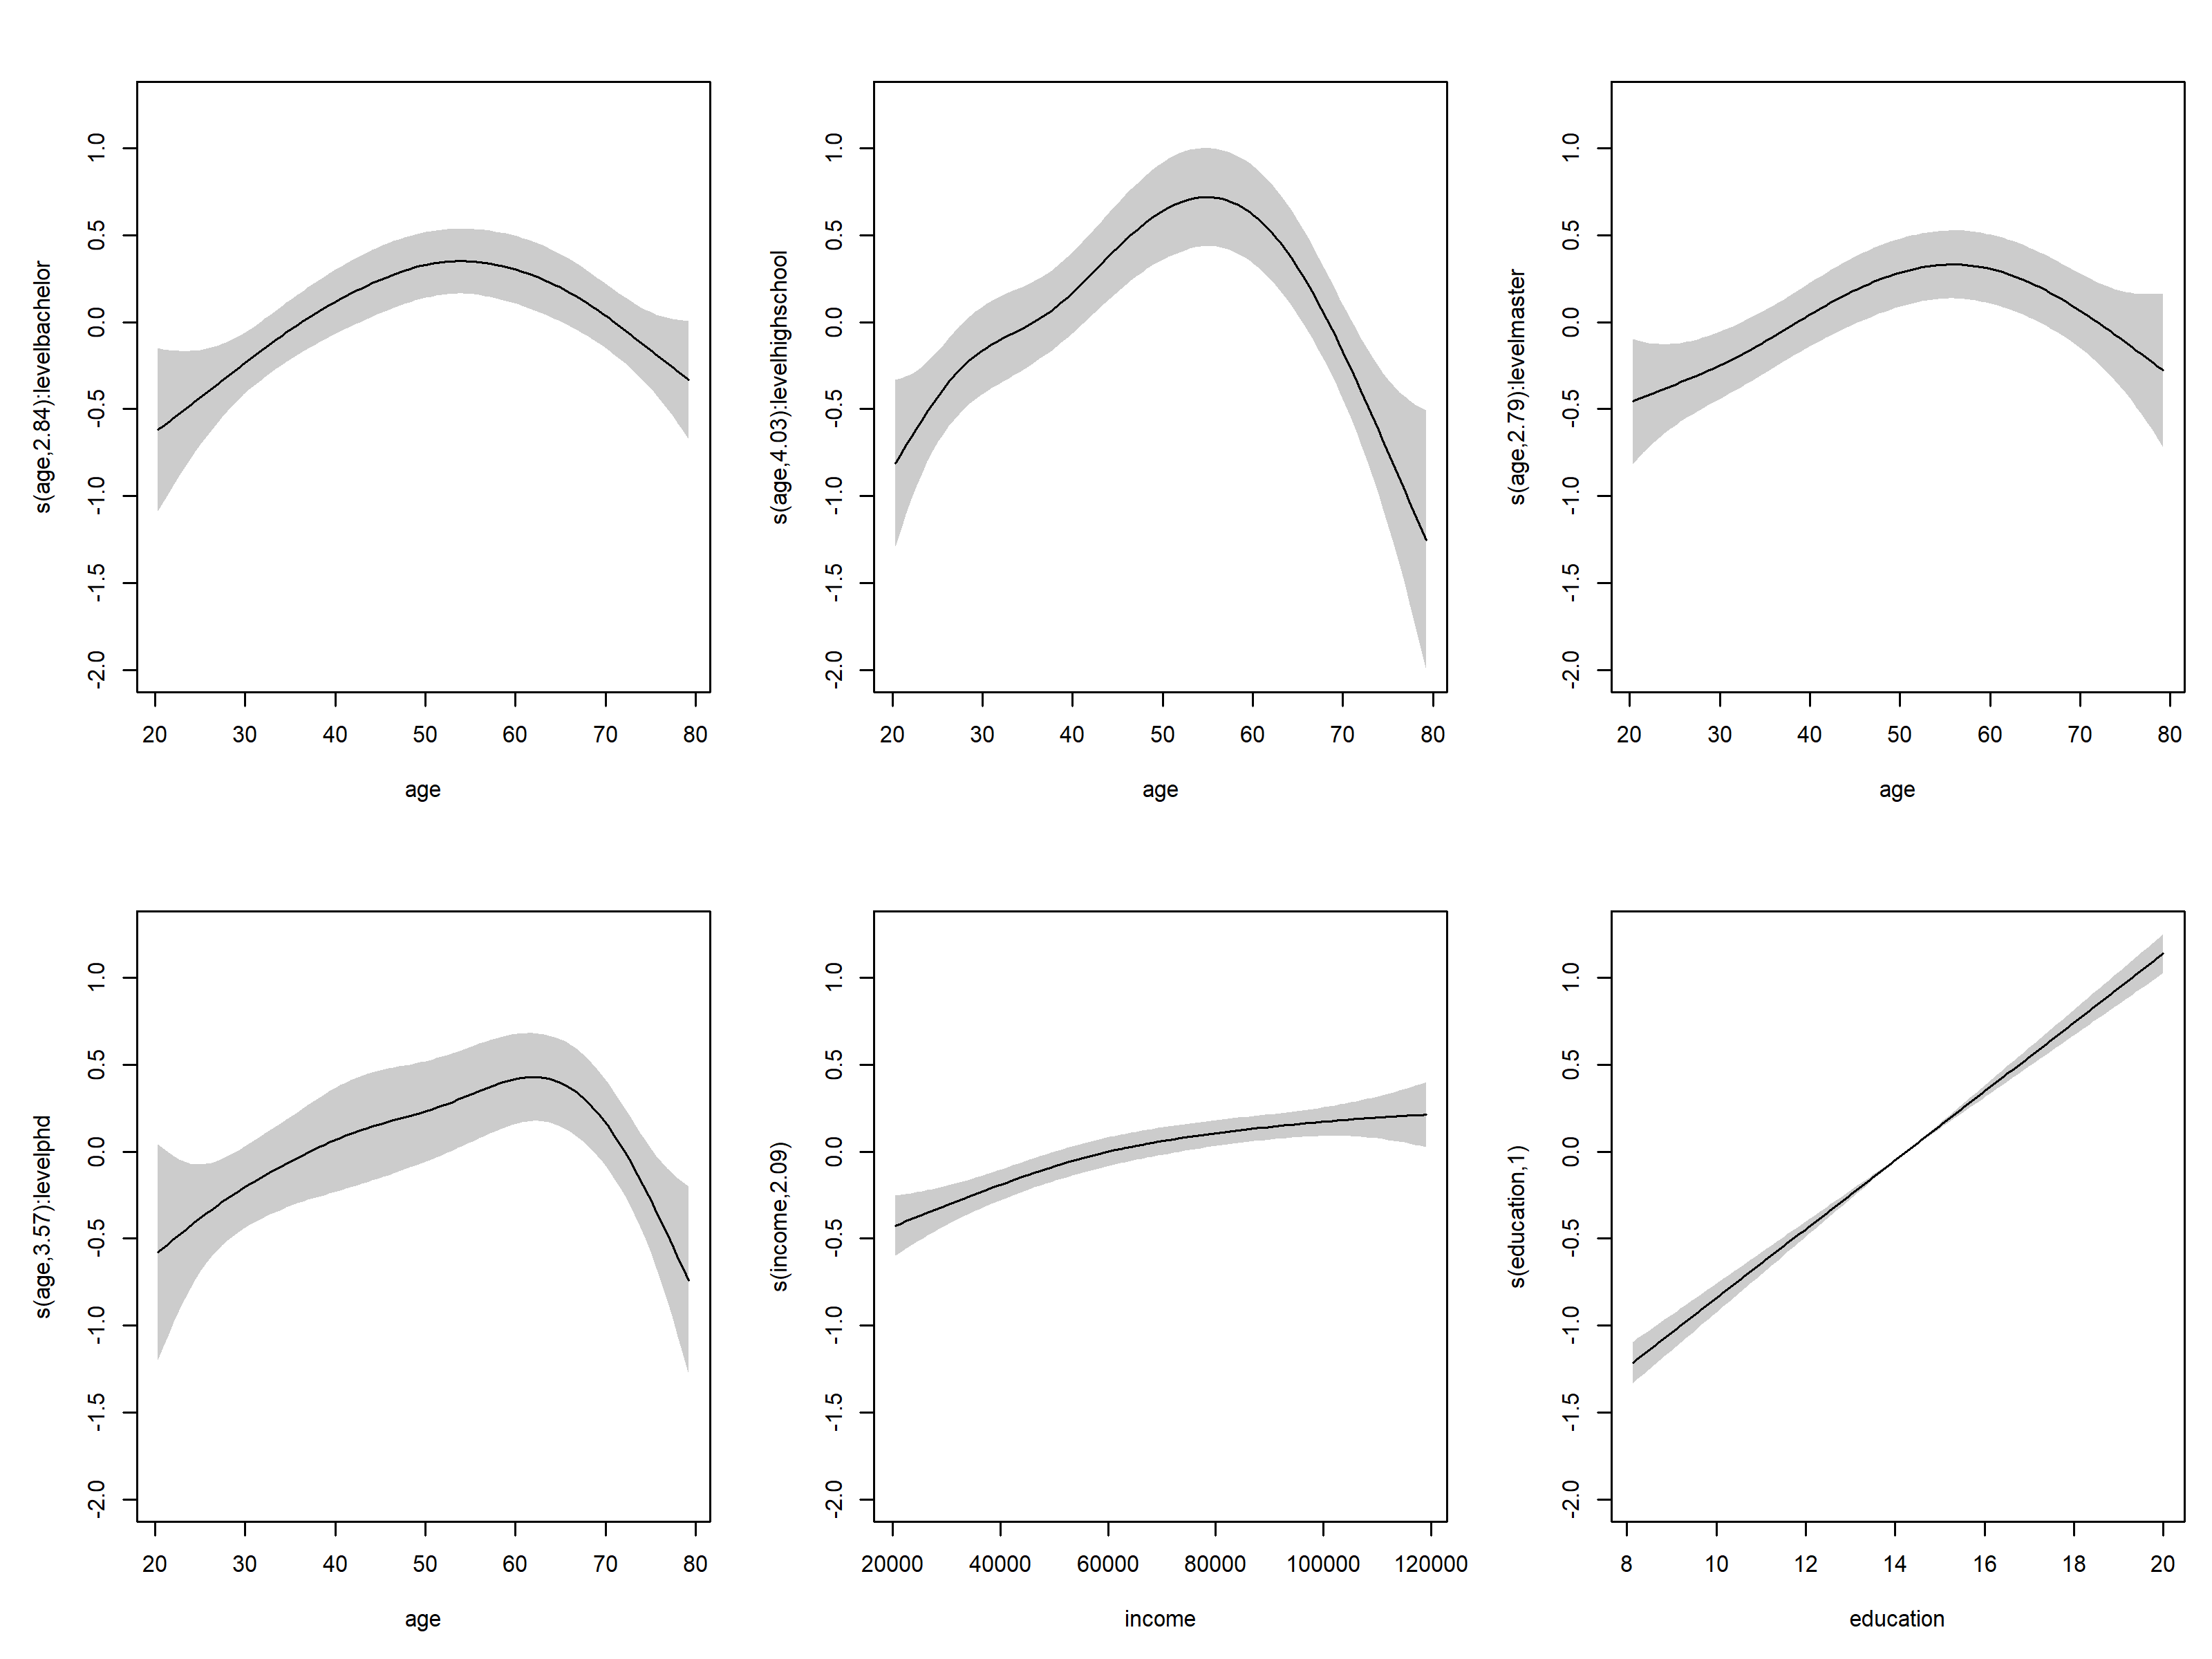

In [5]:
model.plot()

## Reconstruct using GAM Replay Object

In [6]:
from quantbullet.model.gam_replay import GAMReplayModel

c:\Users\yimingz\repo\quantbullet\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
replay = GAMReplayModel.from_fitted_model( model )

In [8]:
mgcv_preds = model.predict( data )
replay_preds = replay.predict( data )

[strip_gam_object] 0 MB → 0 MB
[R predict_bam] n=200 | convert=0.000s strip=0.020s predict=0.006s | total=0.026s
Predictions made from DataFrame[200]: select_cols=0.00s | py_to_r=0.00s | r_predict=0.04s | r_to_py=0.00s | total=0.04s


Text(0, 0.5, 'replay predictions')

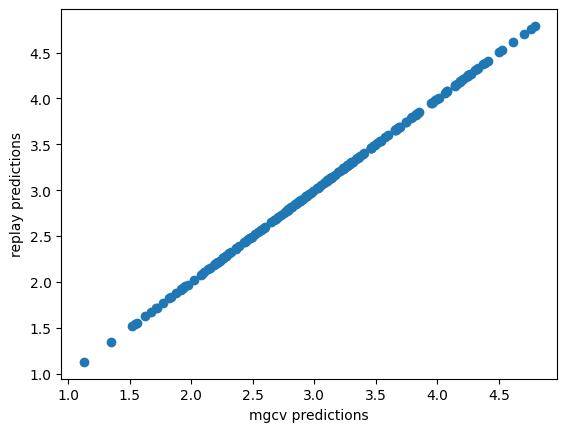

In [9]:
# visualize
plt.scatter(mgcv_preds, replay_preds)
plt.xlabel("mgcv predictions")
plt.ylabel("replay predictions")